In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Curve Fitting with a Neuronal Network

We consider a simple linear model $y = kx + d + w$ where $w$ is some noise

In [68]:
xin = np.linspace(-5, 5, 10)
yin = 0.3 * xin + 5.4 + np.random.rand(10)

In [69]:
x = torch.tensor(xin).float().unsqueeze(1)
y = torch.tensor(yin).float().unsqueeze(1)

In [70]:
x, y

(tensor([[-5.0000],
         [-3.8889],
         [-2.7778],
         [-1.6667],
         [-0.5556],
         [ 0.5556],
         [ 1.6667],
         [ 2.7778],
         [ 3.8889],
         [ 5.0000]]),
 tensor([[4.2989],
         [4.3119],
         [5.4345],
         [5.5334],
         [5.8192],
         [5.7511],
         [6.5317],
         [6.8130],
         [7.1031],
         [7.7228]]))

## Linear Model

In [71]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)
linear_model

Linear(in_features=1, out_features=1, bias=True)

In [72]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.4958]], requires_grad=True),
 Parameter containing:
 tensor([0.5215], requires_grad=True)]

In [73]:
out = linear_model(x)

In [74]:
def loss_fn(x, y):
    squared_diffs = (x - y)**2
    return squared_diffs.mean()

In [75]:
loss_fn(x, out)

tensor(2.8613, grad_fn=<MeanBackward0>)

In [76]:
def training_loop(n_epochs, optimizer, model, loss_fn, x, y):
    for epoch in range(1, n_epochs + 1):
        y_p = model(x)
        loss_train = loss_fn(y_p, y)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}")

In [77]:
training_loop(n_epochs = 5000, optimizer = optimizer, model = linear_model, loss_fn = nn.MSELoss(), x = x, y = y)

Epoch 1, Training loss 29.6072
Epoch 1000, Training loss 0.0486
Epoch 2000, Training loss 0.0486
Epoch 3000, Training loss 0.0486
Epoch 4000, Training loss 0.0486
Epoch 5000, Training loss 0.0486


In [78]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.3282]], requires_grad=True),
 Parameter containing:
 tensor([5.9320], requires_grad=True)]

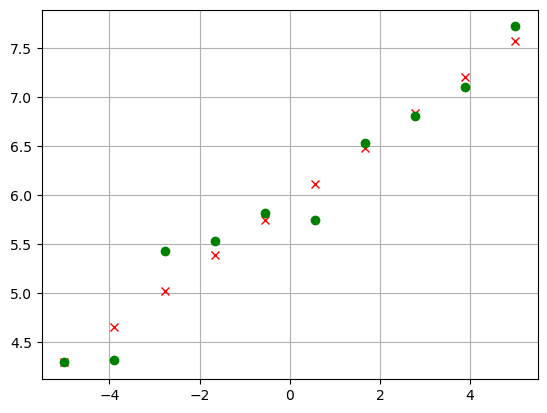

In [79]:
plt.plot(x, linear_model(x).detach().numpy(), 'rx')
plt.plot(xin, yin, 'go')
plt.grid()

## Non-linear Model

In [80]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13,1))

In [81]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-2)

In [82]:
training_loop(n_epochs = 5000, optimizer = optimizer, model = seq_model, loss_fn = nn.MSELoss(), x = x, y = y)

Epoch 1, Training loss 36.2982
Epoch 1000, Training loss 0.0406
Epoch 2000, Training loss 0.0345
Epoch 3000, Training loss 0.0322
Epoch 4000, Training loss 0.0311
Epoch 5000, Training loss 0.0304


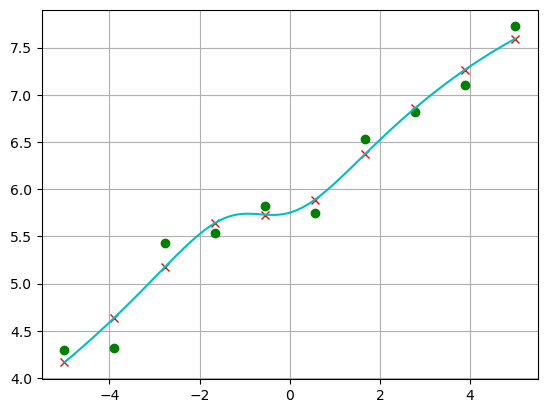

In [83]:
t_range = torch.linspace(-5, 5, steps = 100).unsqueeze(1)

plt.plot(x, seq_model(x).detach().numpy(), 'rx')
plt.plot(x, y, 'go')

plt.plot(t_range.numpy(), seq_model(t_range).detach().numpy(), 'c-')

plt.grid()

### Add-on: Freeze Layers

Let's add a little twist to the non-linear model. We freeze the first linear layer and train only the rest. Theoretically, the performance of the overall model should be worse as we have fewer degree of freedoms to adapt during training.

In [94]:
from collections import OrderedDict

seq_model_2 = nn.Sequential(
    OrderedDict(
        [
            ("lin1", nn.Linear(1, 13)),
            ("tanh", nn.Tanh()),
            ("lin2", nn.Linear(13, 1))
        ]
    )
)

seq_model_2

Sequential(
  (lin1): Linear(in_features=1, out_features=13, bias=True)
  (tanh): Tanh()
  (lin2): Linear(in_features=13, out_features=1, bias=True)
)

In [97]:
list(seq_model_2.lin1.parameters())

[Parameter containing:
 tensor([[-0.0074],
         [-0.3505],
         [-0.4670],
         [-0.9673],
         [-0.8369],
         [ 0.1940],
         [-0.6944],
         [-0.1715],
         [-0.8972],
         [-0.7834],
         [ 0.6048],
         [-0.0861],
         [ 0.5584]], requires_grad=True),
 Parameter containing:
 tensor([ 0.7905,  0.0371, -0.5137,  0.8319,  0.8217,  0.3592, -0.4042, -0.9187,
          0.8100, -0.4974, -0.6631, -0.8106,  0.2590], requires_grad=True)]

In [103]:
seq_model_2.lin1.weight.requires_grad = False
seq_model_2.lin1.bias.requires_grad = False

In [104]:
list(seq_model_2.lin1.parameters())

[Parameter containing:
 tensor([[-0.0074],
         [-0.3505],
         [-0.4670],
         [-0.9673],
         [-0.8369],
         [ 0.1940],
         [-0.6944],
         [-0.1715],
         [-0.8972],
         [-0.7834],
         [ 0.6048],
         [-0.0861],
         [ 0.5584]]),
 Parameter containing:
 tensor([ 0.7905,  0.0371, -0.5137,  0.8319,  0.8217,  0.3592, -0.4042, -0.9187,
          0.8100, -0.4974, -0.6631, -0.8106,  0.2590])]

In [105]:
list(seq_model_2.parameters())

[Parameter containing:
 tensor([[-0.0074],
         [-0.3505],
         [-0.4670],
         [-0.9673],
         [-0.8369],
         [ 0.1940],
         [-0.6944],
         [-0.1715],
         [-0.8972],
         [-0.7834],
         [ 0.6048],
         [-0.0861],
         [ 0.5584]]),
 Parameter containing:
 tensor([ 0.7905,  0.0371, -0.5137,  0.8319,  0.8217,  0.3592, -0.4042, -0.9187,
          0.8100, -0.4974, -0.6631, -0.8106,  0.2590]),
 Parameter containing:
 tensor([[-0.1422,  0.2629, -0.1623, -0.1356, -0.2691, -0.1030, -0.2593, -0.0877,
          -0.0797,  0.1695,  0.2550, -0.0176, -0.1285]], requires_grad=True),
 Parameter containing:
 tensor([-0.0893], requires_grad=True)]

In [106]:
training_loop(n_epochs = 5000, optimizer = optimizer, model = seq_model_2, loss_fn = nn.MSELoss(), x = x, y = y)

Epoch 1, Training loss 38.5334
Epoch 1000, Training loss 38.5334
Epoch 2000, Training loss 38.5334
Epoch 3000, Training loss 38.5334
Epoch 4000, Training loss 38.5334
Epoch 5000, Training loss 38.5334


In [107]:
list(seq_model_2.parameters())

[Parameter containing:
 tensor([[-0.0074],
         [-0.3505],
         [-0.4670],
         [-0.9673],
         [-0.8369],
         [ 0.1940],
         [-0.6944],
         [-0.1715],
         [-0.8972],
         [-0.7834],
         [ 0.6048],
         [-0.0861],
         [ 0.5584]]),
 Parameter containing:
 tensor([ 0.7905,  0.0371, -0.5137,  0.8319,  0.8217,  0.3592, -0.4042, -0.9187,
          0.8100, -0.4974, -0.6631, -0.8106,  0.2590]),
 Parameter containing:
 tensor([[-0.1422,  0.2629, -0.1623, -0.1356, -0.2691, -0.1030, -0.2593, -0.0877,
          -0.0797,  0.1695,  0.2550, -0.0176, -0.1285]], requires_grad=True),
 Parameter containing:
 tensor([-0.0893], requires_grad=True)]

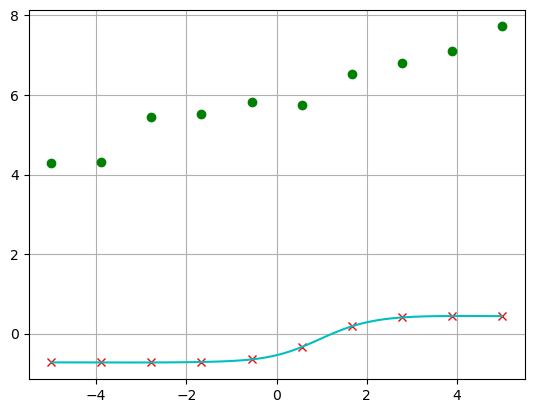

In [108]:
t_range = torch.linspace(-5, 5, steps = 100).unsqueeze(1)

plt.plot(x, seq_model_2(x).detach().numpy(), 'rx')
plt.plot(x, y, 'go')

plt.plot(t_range.numpy(), seq_model_2(t_range).detach().numpy(), 'c-')

plt.grid()

### Alternative

Build the model using a sequence of layers & access the layers via their index.

In [109]:
seq_model_3 = nn.Sequential(
            nn.Linear(1, 13),
            nn.Tanh(),
            nn.Linear(13, 1))

seq_model_3

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In both cases, it is imprtant to set **both** weight & bias to `requires_grad = False`

In [112]:
seq_model_3[0].weight.requires_grad = False
seq_model_3[0].bias.requires_grad = False